## This document was used to produce visuals for a presentation.  It recreates certain visuals from elsewhere in the code notebook with clearer titles and nicer overall visuals designed for a non-technical or semi-technical audience. ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('../datasets/train_1.csv', keep_default_na=False, na_values='null')

In [3]:
X = train[['year_built']]
y = train['saleprice']

In [4]:
linreg = LinearRegression()
linreg.fit(X, y);

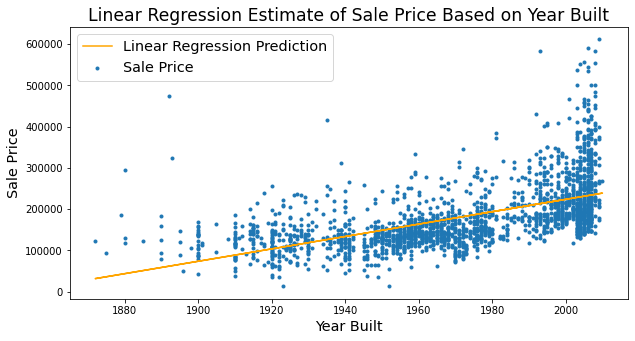

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, marker='.')
plt.plot(X, linreg.predict(X), color='orange')
plt.xlabel('Year Built', fontsize='x-large')
plt.ylabel('Sale Price', fontsize='x-large')
plt.title('Linear Regression Estimate of Sale Price Based on Year Built', fontsize='xx-large')
plt.legend(['Linear Regression Prediction', 'Sale Price'], fontsize='x-large');

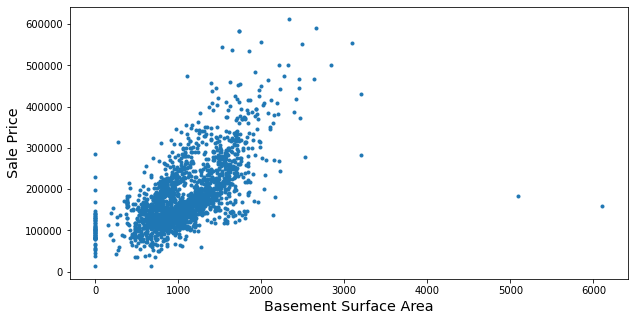

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(train['total_bsmt_sf'], y, marker='.')
plt.xlabel('Basement Surface Area', fontsize='x-large')
plt.ylabel('Sale Price', fontsize='x-large');

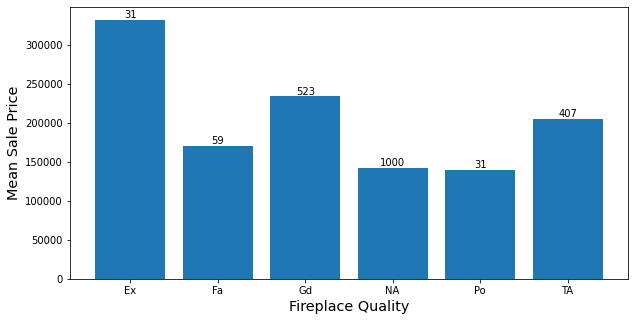

In [7]:
# Adapted from graphtools module

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

price_by_group = train['saleprice'].groupby(train['fireplace_qu']).mean()
plot = ax.bar(price_by_group.index, price_by_group)
ax.set_xlabel('Fireplace Quality', fontsize='x-large')
ax.set_ylabel('Mean Sale Price', fontsize='x-large')
ax.bar_label(plot, train['fireplace_qu'].groupby(train['fireplace_qu']).size());

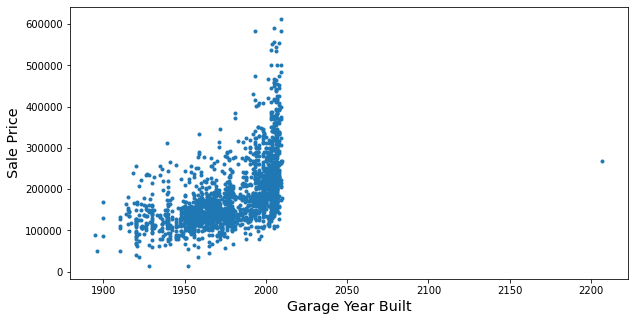

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(train['garage_yr_blt'], y, marker='.')
plt.xlabel('Garage Year Built', fontsize='x-large')
plt.ylabel('Sale Price', fontsize='x-large');

In [9]:
garfin_scale = {
    '' : np.nan,
    'NA' : 0,
    'Unf' : 1,
    'RFn' : 2,
    'Fin' : 3
}
train['garage_finish'] = train['garage_finish'].map(garfin_scale)

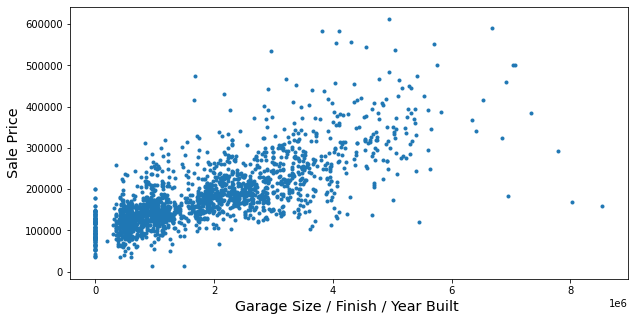

In [10]:
train['garage'] = train['garage_yr_blt'].fillna(0) * train['garage_area'] * train['garage_finish']
plt.figure(figsize=(10,5))
plt.scatter(train['garage'], y, marker='.')
plt.xlabel('Garage Size / Finish / Year Built ', fontsize='x-large')
plt.ylabel('Sale Price', fontsize='x-large');